In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from plot_paper_utils import plot_ev_vs_task_singlemonkey_singletask, plot_layer_hist_single_task_layer

import sys
sys.path.append('../code')
from path_utils import PATH_TO_RESULTS

In [2]:
%load_ext autoreload
%autoreload 2

#### Load the results

In [3]:
exp_condition = 'passive'

In [4]:
res_df = pd.read_hdf(os.path.join(PATH_TO_RESULTS,'task_driven_results_'+exp_condition+'.h5'), 'df')  
res_df_0 = pd.read_hdf(os.path.join(PATH_TO_RESULTS,'untrained_results_'+exp_condition+'.h5'), 'df')  

save_flag = False
PATH_TO_FIG = None

In [5]:
area = 'S1'
res_df_area = res_df[res_df.area==area]

In [6]:
n_max_layer = 10

### Parameters
test_flag = True
mean_flag_all = False ## Taking the mean of neurons (not max)
standardize_flag = False
quantile_flag = False
quantile_value = 1
model_layer_flag = False
model_layer = 0
tuned_flag = False
norm_flag = False
## Mean or median for Neural explainability
mean_flag = True
if mean_flag:
    median_flag = False
else:
    median_flag = True

### Add to the dictionary
flag_dict = {}
flag_dict['area'] = area
flag_dict['test_flag'] = test_flag
flag_dict['mean_flag'] = mean_flag
flag_dict['standardize_flag'] = standardize_flag
flag_dict['median_flag'] = median_flag
flag_dict['mean_flag_all'] = mean_flag_all
flag_dict['quantile_flag'] = quantile_flag
flag_dict['quantile_value'] = quantile_value
flag_dict['model_layer_flag'] = model_layer_flag
flag_dict['model_layer'] = model_layer
flag_dict['save_flag'] = save_flag
flag_dict['norm_flag'] = norm_flag
flag_dict['tuned'] = tuned_flag
flag_dict['layer_neural_expl_flag'] = True
flag_dict['neuron_neural_expl_flag'] = False

In [7]:
model_task_list = ['classification', 'torque', 'regression', 'regress_ee_vel','regress_ee_pos_vel','regress_ee_pos_vel_acc', 'regress_ee_elbow_pos','regress_ee_elbow_vel','regress_ee_elbow_pos_vel','regress_ee_elbow_pos_vel_acc', \
    'regress_joints_pos', 'regress_joints_vel','regress_joints_pos_vel','regress_joints_pos_vel_acc','bt','autoencoder']

model_type_list = ['spatial_temporal', 'temporal_spatial', 'spatiotemporal']

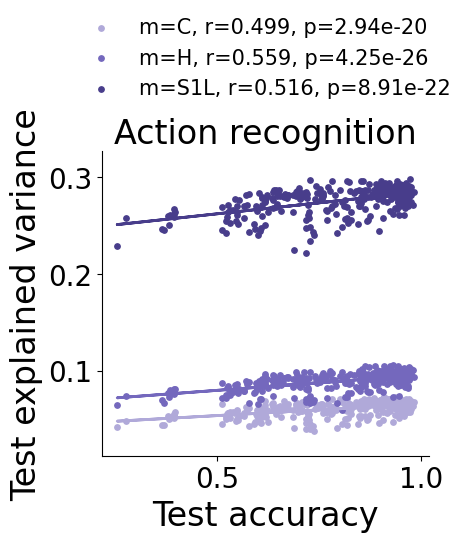

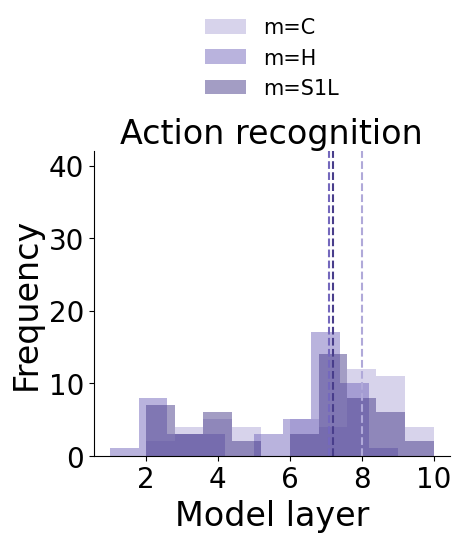

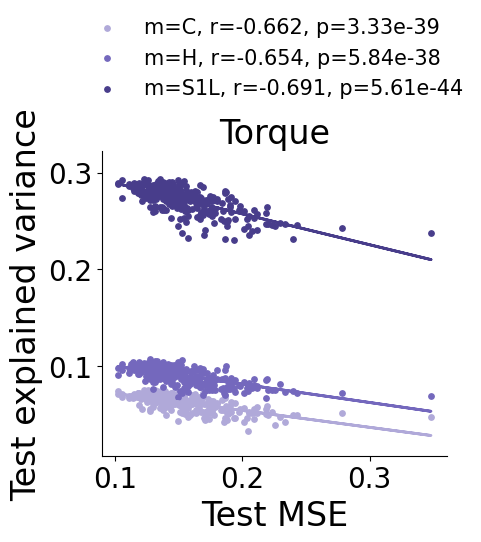

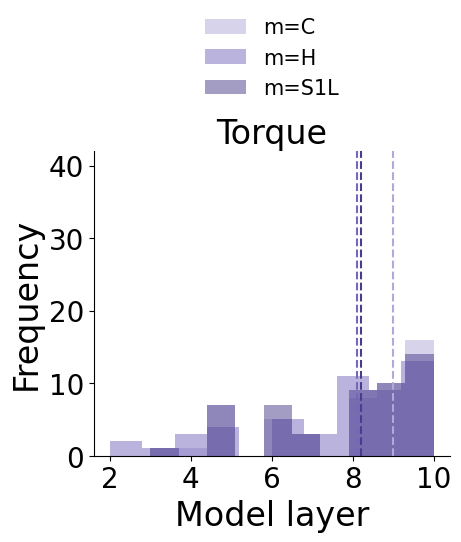

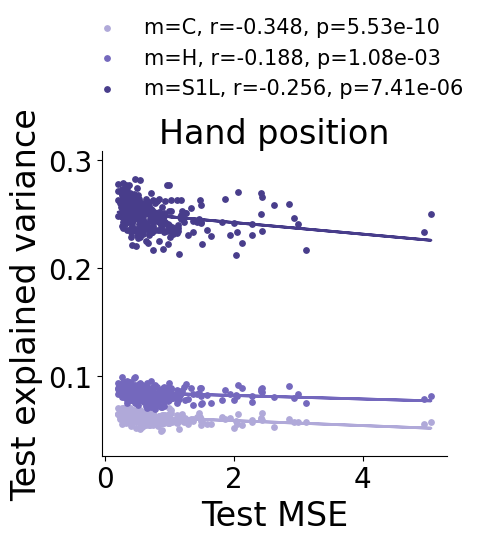

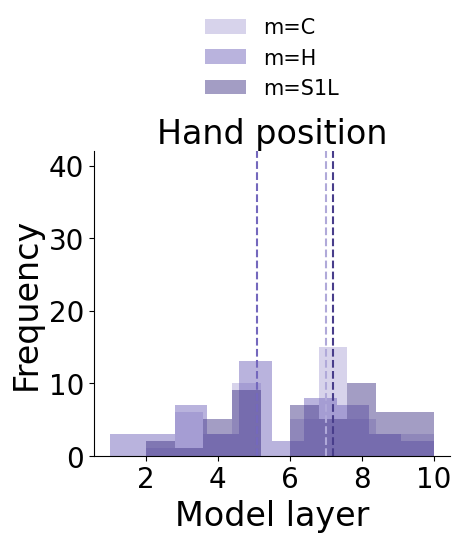

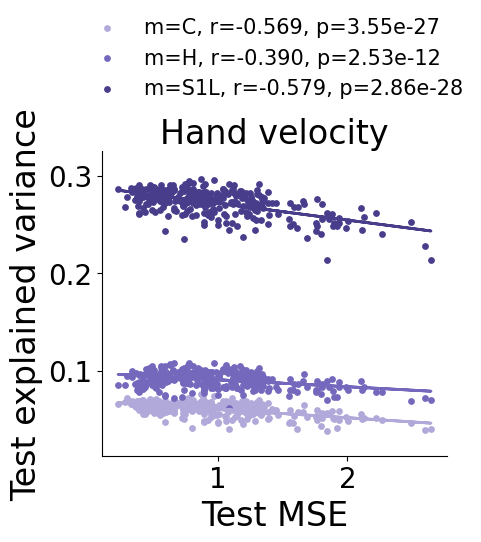

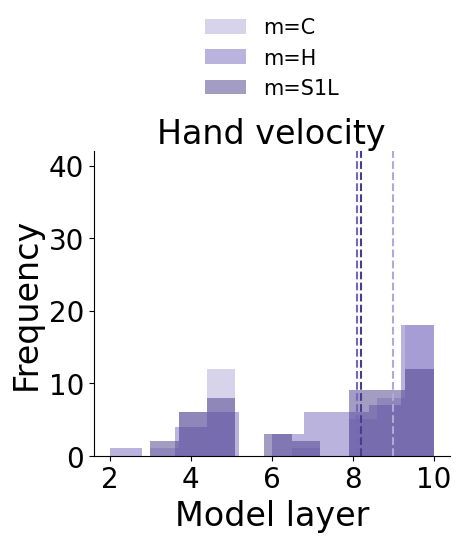

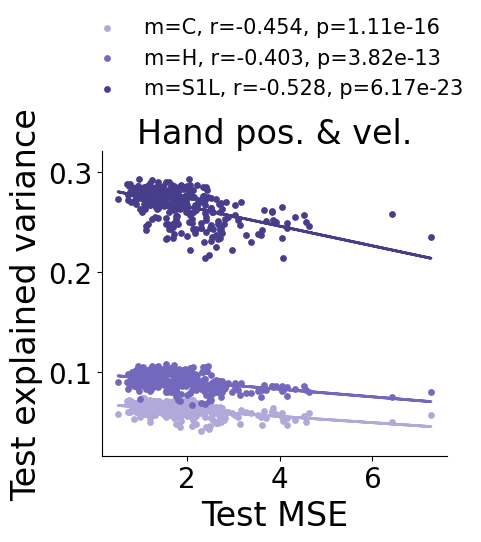

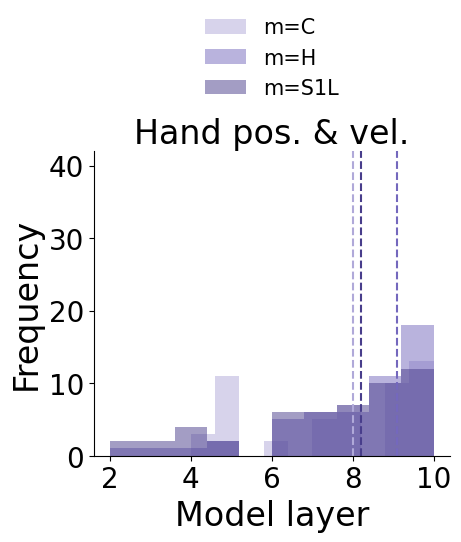

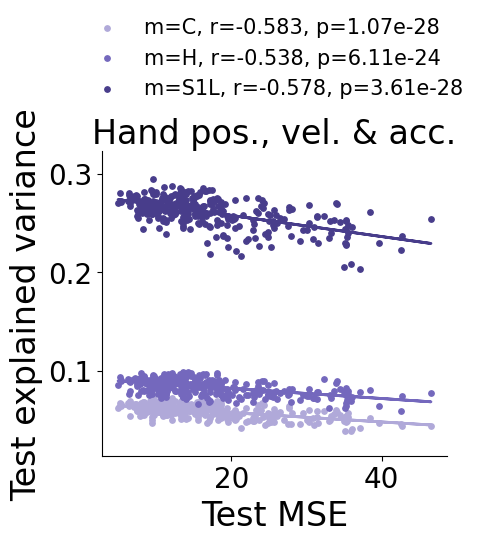

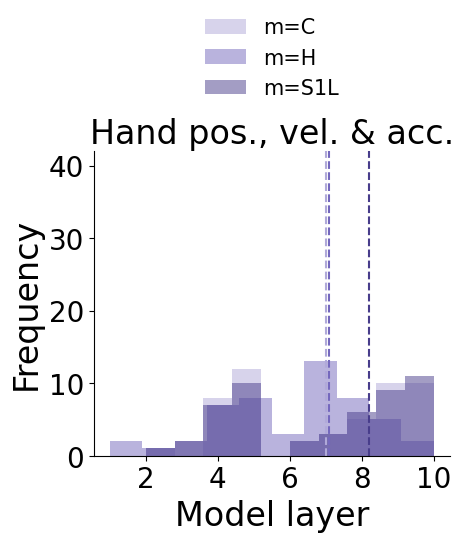

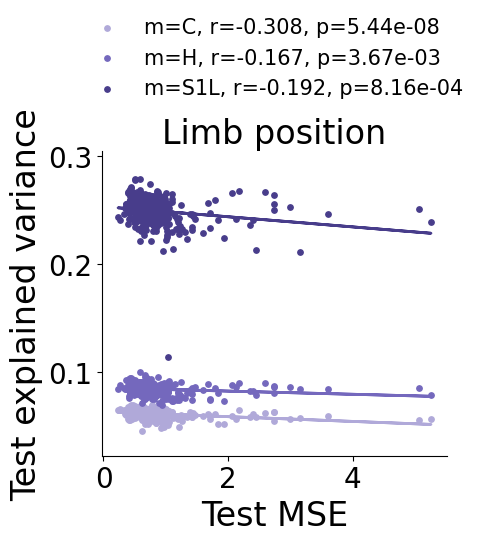

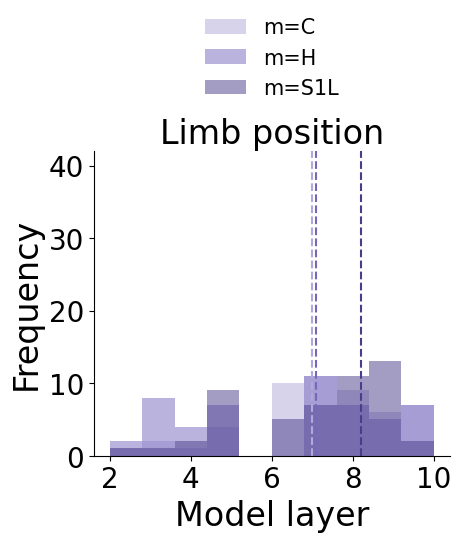

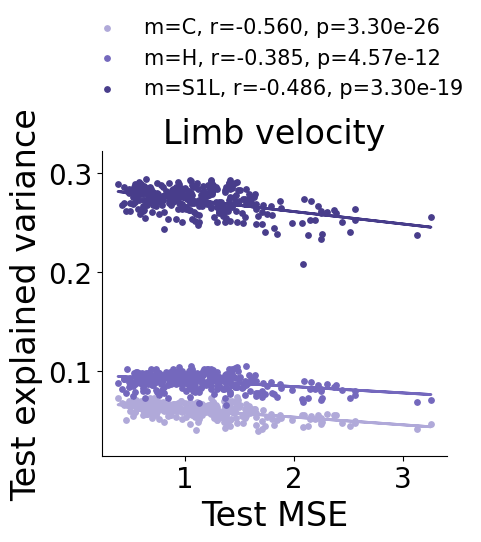

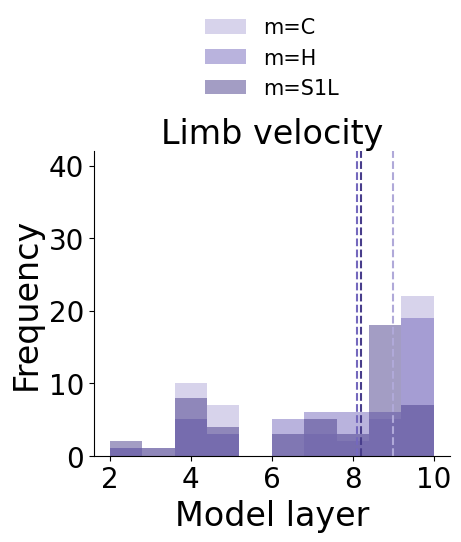

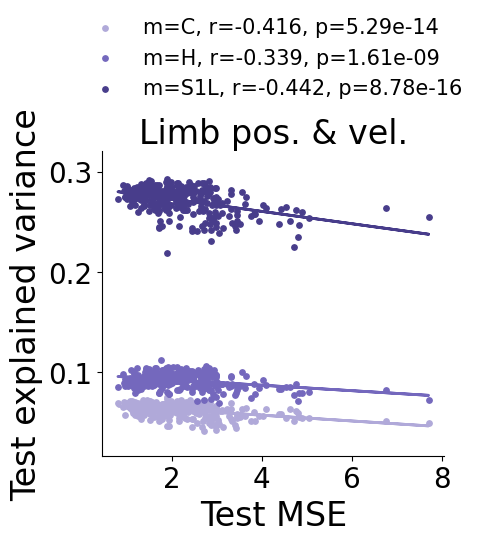

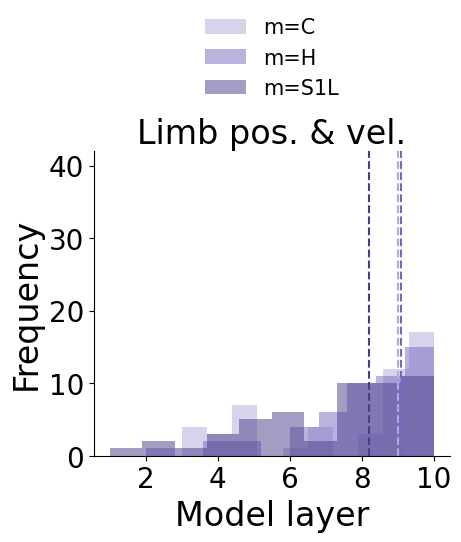

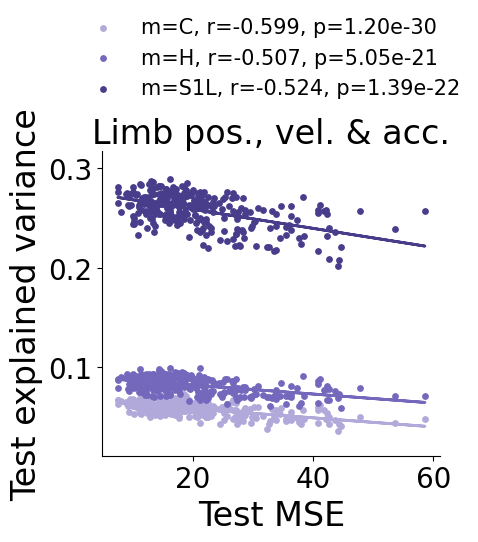

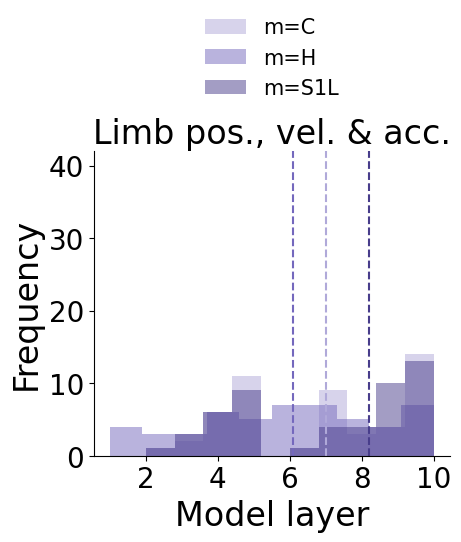

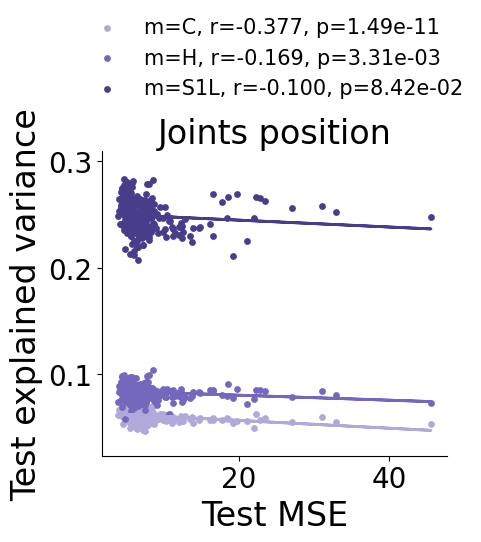

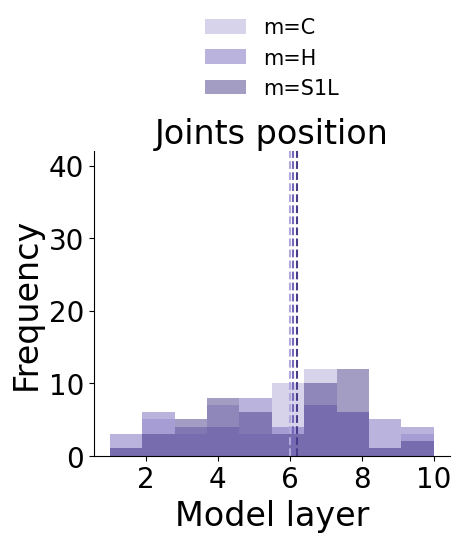

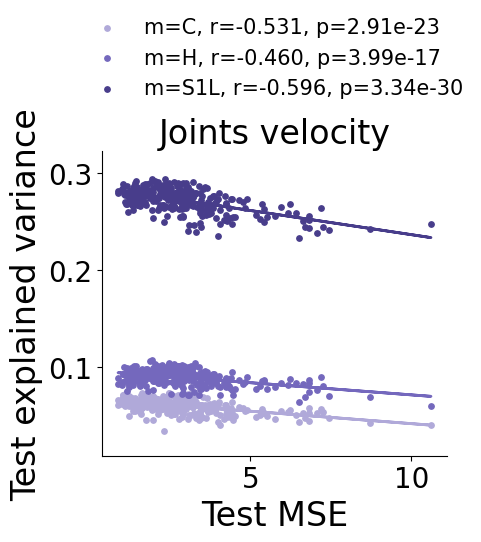

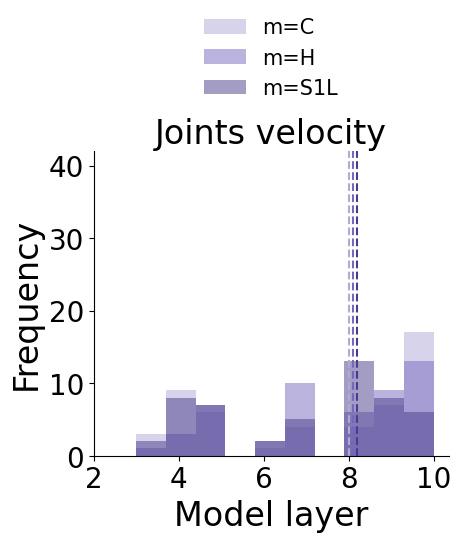

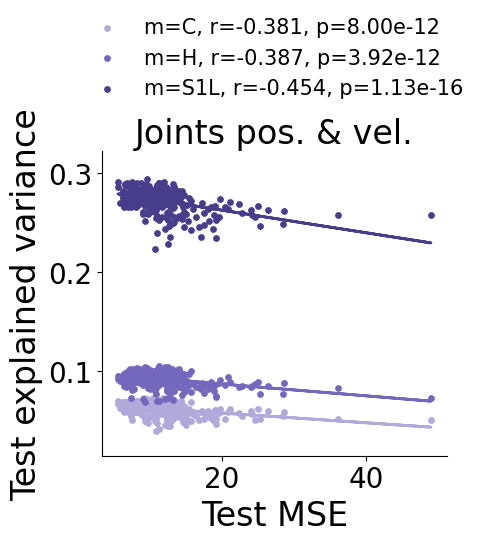

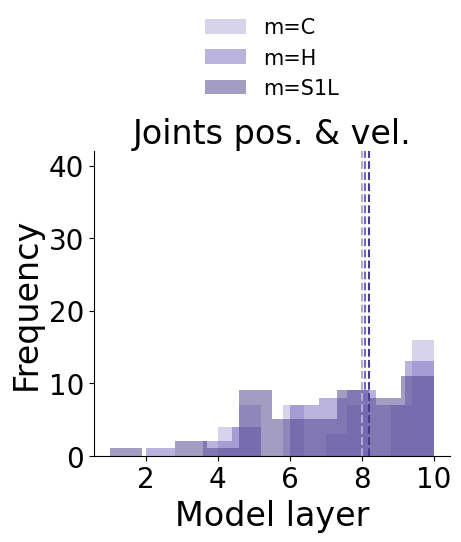

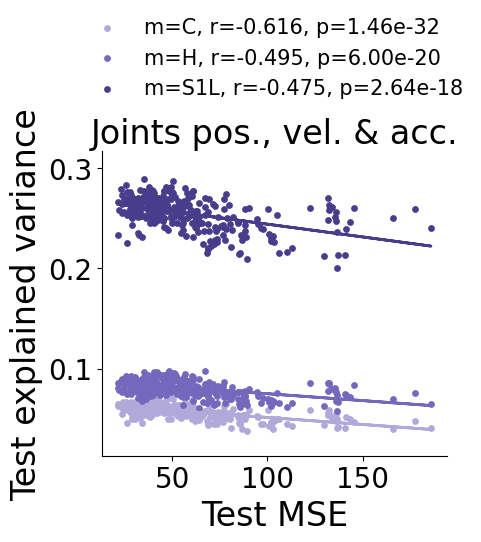

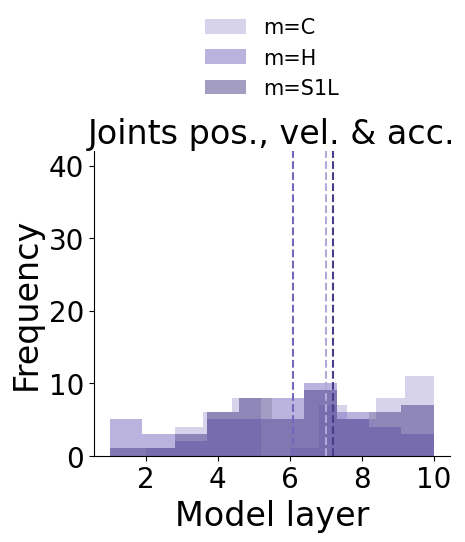

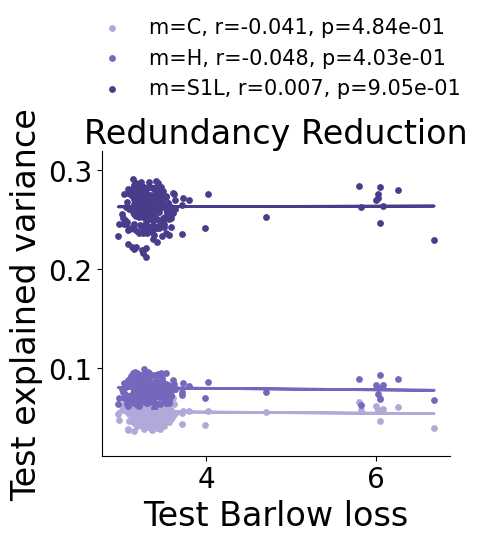

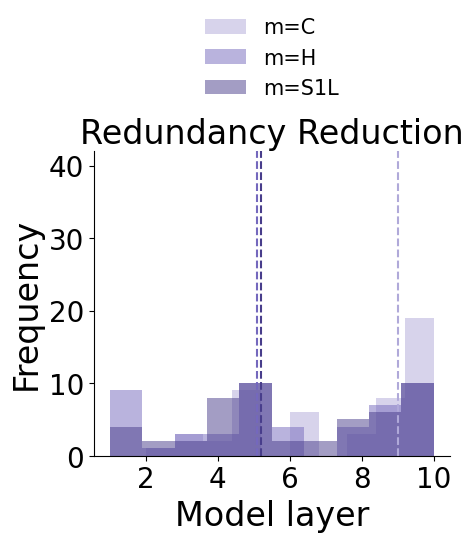

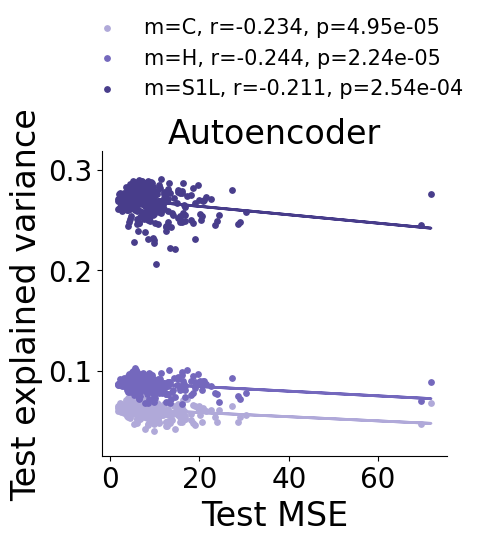

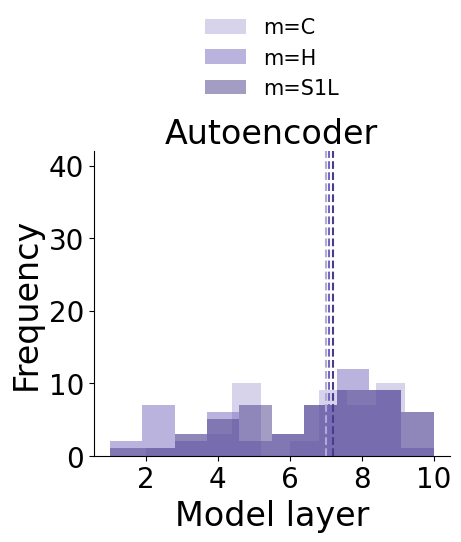

In [8]:
for model_task in model_task_list:
    best_layers = plot_ev_vs_task_singlemonkey_singletask(res_df_area,model_task, model_type_list, n_max_layer, flag_dict, PATH_TO_FIG)
    plot_layer_hist_single_task_layer(res_df_area,best_layers,model_task, n_max_layer, flag_dict, PATH_TO_FIG)